In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
pd.set_option('display.max_columns', None)

In [3]:
# let notebook don't show output
# plt.ioff()

In [4]:
# Load the dataset
file_path = './vehicle_data.csv'
vehicle_data = pd.read_csv(file_path)

In [5]:
# 1. Inspect the data
#vehicle_data.info()
vehicle_data.head()

,first_listed,listing_removed,seller_type,age_in_mths,kms,color,state,price_drop_count,sale_price,vehicle_rrp,rv_pct,segment,sub_segment,make,model,year,badge,series,vehicle_title,model_year,body_type,transmission_type,drive_type,fuel_type,wheelbase_type,body_config_type,power_kw,num_doors,num_seats,num_gears,capacity_cc
0,2023-06-29,2023-09-22,dealer,17,4685,Cape York Green,VIC,5,68008,56963.0,119.4,SUV,Small,BMW,X1,2022,sDrive18i,U11,2022 BMW X1 sDrive18i U11 Auto,NaN,SUV,Automatic,2WD,Petrol,NaN,NaN,115.0,5.0,5.0,7.0,1499.0
1,2023-10-19,2023-12-01,dealer,17,9560,Orange,WA,3,69759,56963.0,122.5,SUV,Small,BMW,X1,2022,sDrive18i,U11,2022 BMW X1 sDrive18i U11 Auto,NaN,SUV,Automatic,2WD,Petrol,NaN,NaN,115.0,5.0,5.0,7.0,1499.0
2,2023-06-03,2023-08-30,dealer,17,8256,Phytonic Blue,NSW,8,63358,56963.0,111.2,SUV,Small,BMW,X1,2022,sDrive18i,U11,2022 BMW X1 sDrive18i U11 Auto,NaN,SUV,Automatic,2WD,Petrol,NaN,NaN,115.0,5.0,5.0,7.0,1499.0
3,2023-10-20,2023-12-23,dealer,17,5355,San Remo Green,NSW,6,63459,56963.0,111.4,SUV,Small,BMW,X1,2022,sDrive18i,U11,2022 BMW X1 sDrive18i U11 Auto,NaN,SUV,Automatic,2WD,Petrol,NaN,NaN,115.0,5.0,5.0,7.0,1499.0
4,2023-06-24,2023-09-10,dealer,17,5190,Utah Orange,VIC,10,65024,56963.0,114.2,SUV,Small,BMW,X1,2022,sDrive18i,U11,2022 BMW X1 sDrive18i U11 Auto,NaN,SUV,Automatic,2WD,Petrol,NaN,NaN,115.0,5.0,5.0,7.0,1499.0


In [6]:
# 2. Handle missing values
missing_values = vehicle_data.isnull().sum()
print("Missing values per column:\n", missing_values)

Missing values per column:
 first_listed              0
listing_removed           0
seller_type               0
age_in_mths               0
kms                       0
color                 18069
state                     0
price_drop_count          0
sale_price                0
vehicle_rrp           13639
rv_pct                13639
segment                   0
sub_segment               0
make                      0
model                     0
year                      0
badge                 57369
series                37518
vehicle_title             0
model_year            55342
body_type                 0
transmission_type         0
drive_type                0
fuel_type                 0
wheelbase_type       845221
body_config_type     714778
power_kw               1892
num_doors                68
num_seats               618
num_gears               592
capacity_cc          224898
dtype: int64


In [8]:
# Custom function to process 'model_year' and compare with 'year'
# return True if model_year is +/-1 year from 'year column'
def compare_model_year(row):
    model_year = str(row['model_year'])
    year = row['year']
    
    if 'MY' in model_year:
        try:
            extracted_year = int(model_year.split('MY')[1][:2])
            # Compare the extracted year with the last 2 digits of the 'year' column
            return (extracted_year == int(str(year)[-2:])) or (extracted_year == int(str(year)[-2:])+1) or (extracted_year == int(str(year)[-2:])-1)
        except (ValueError, IndexError):
            return False
    else:
        return False

# Apply the function to each row
comparison_result = vehicle_data.apply(compare_model_year, axis=1)

# Display the DataFrame
print(comparison_result)

0         False
1         False
2         False
3         False
4         False
          ...  
862539     True
862540     True
862541     True
862542     True
862543     True
Length: 862544, dtype: bool


In [9]:
# 99% of the 'model_year' is -/+1 of 'year' column
# can delete 'model_year'
comparison_result.sum()/vehicle_data[['model_year']].count()[0]

/var/folders/93/pnfdwlvs48sb42_cx9w88ltc0000gn/T/ipykernel_50631/2470801164.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  comparison_result.sum()/vehicle_data[['model_year']].count()[0]


0.9916068096957144

In [10]:
# 1892 with missing power 
# 940 with missing power but having capacity
vehicle_data[
(vehicle_data['power_kw'].isnull()) 
#& (~vehicle_data['capacity_cc'].isnull())
].head()


,first_listed,listing_removed,seller_type,age_in_mths,kms,color,state,price_drop_count,sale_price,vehicle_rrp,rv_pct,segment,sub_segment,make,model,year,badge,series,vehicle_title,model_year,body_type,transmission_type,drive_type,fuel_type,wheelbase_type,body_config_type,power_kw,num_doors,num_seats,num_gears,capacity_cc
2409,2023-11-09,2023-11-11,private,149,338355,White,QLD,0,11627,NaN,NaN,LCV - Vans & Buses,Vans/CC,Toyota,Hiace,2011,DX,TRH200,2011 Toyota Hiace DX Manual,NaN,Van,Manual,2WD,Petrol,NaN,NaN,NaN,4.0,3.0,5.0,1998.0
6091,2023-05-16,2023-08-08,private,125,159355,silver,VIC,1,28980,NaN,NaN,LCV - Vans & Buses,Vans/CC,Toyota,Hiace,2013,NaN,KDH206K,2013 Toyota Hiace LWB Auto 4WD,NaN,Van,Automatic,4WD,Diesel,LWB,NaN,NaN,4.0,6.0,4.0,NaN
6280,2023-10-23,2023-10-25,private,125,193355,white,SA,0,24840,NaN,NaN,LCV - Vans & Buses,Vans/CC,Toyota,Hiace,2013,NaN,KDH206K,2013 Toyota Hiace LWB Auto 4WD,NaN,Van,Automatic,4WD,Diesel,LWB,NaN,NaN,4.0,6.0,4.0,NaN
6390,2023-10-06,2023-10-13,private,125,191355,white,VIC,0,20183,NaN,NaN,LCV - Vans & Buses,Vans/CC,Toyota,Hiace,2013,NaN,KDH206K,2013 Toyota Hiace LWB Auto 4WD,NaN,Van,Automatic,4WD,Diesel,LWB,NaN,NaN,4.0,6.0,4.0,NaN
6455,2023-12-13,2023-12-19,private,125,289355,green,NSW,0,20058,NaN,NaN,LCV - Vans & Buses,Vans/CC,Toyota,Hiace,2013,NaN,KDH206K,2013 Toyota Hiace LWB Auto 4WD,NaN,Van,Automatic,4WD,Diesel,LWB,NaN,NaN,4.0,6.0,4.0,NaN


In [11]:
#dealing with missing values
def dealing_missing_value(vehicle_data:pd.DataFrame)-> pd.DataFrame:
    

    # Drop rows where 'vehicle_rrp' or 'rv_pct' are missing
    vehicle_data = vehicle_data.dropna(subset=['vehicle_rrp', 'rv_pct'])
    
    # Fill 'badge' and 'series' with 'missing' placeholder
    vehicle_data['badge'].fillna('missing', inplace=True)
    vehicle_data['series'].fillna('missing', inplace=True)
          
    
    # Impute 'power_kw' with the most common value within the same attributes
    # Assuming 'same attributes' are other columns that define the car uniquely, like 'make', 'model', etc.
    def impute_power_kw(row, df):
        if pd.isnull(row['power_kw']):

            # infer from same make and model and capacity
            if ~pd.isnull(row['capacity_cc']):
                common_power_kw = df[(df['make'] == row['make']) & 
                                 (df['model'] == row['model'])&
                                 (df['capacity_cc'] == row['capacity_cc'])
                                ]['power_kw'].mode()
            
            # infer from same make and model
            else:
                common_power_kw = df[(df['make'] == row['make']) & 
                                 (df['model'] == row['model'])
                                ]['power_kw'].mode()
            
            if len(common_power_kw) > 0:
                return common_power_kw.iloc[0]
            else:
                return df['power_kw'].mode().iloc[0]  # Fallback to the most common overall
        else:
            return row['power_kw']
    
    vehicle_data['power_kw'] = vehicle_data.apply(impute_power_kw, df=vehicle_data, axis=1)
    
    # Fill 'color', 'num_doors', 'num_seats', and 'num_gears' with 'missing' placeholder
    vehicle_data['color'].fillna('missing', inplace=True)
    vehicle_data['num_doors'].fillna('missing', inplace=True)
    vehicle_data['num_seats'].fillna('missing', inplace=True)
    vehicle_data['num_gears'].fillna('missing', inplace=True)
    vehicle_data['num_doors'] = vehicle_data['num_doors'].astype('str')
    vehicle_data['num_seats'] = vehicle_data['num_seats'].astype('category')
    vehicle_data['num_gears'] = vehicle_data['num_gears'].astype('category')

    


    return vehicle_data

In [12]:
vehicle_data_cleaned = dealing_missing_value(vehicle_data)

/var/folders/93/pnfdwlvs48sb42_cx9w88ltc0000gn/T/ipykernel_50631/825380731.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  vehicle_data['badge'].fillna('missing', inplace=True)
/var/folders/93/pnfdwlvs48sb42_cx9w88ltc0000gn/T/ipykernel_50631/825380731.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vehicle_data['badge'].fillna('missing

In [13]:
# Verify the modifications
missing_values = vehicle_data_cleaned.isnull().sum()
print("Missing values per column:\n", missing_values)

Missing values per column:
 first_listed              0
listing_removed           0
seller_type               0
age_in_mths               0
kms                       0
color                     0
state                     0
price_drop_count          0
sale_price                0
vehicle_rrp               0
rv_pct                    0
segment                   0
sub_segment               0
make                      0
model                     0
year                      0
badge                     0
series                    0
vehicle_title             0
model_year            42276
body_type                 0
transmission_type         0
drive_type                0
fuel_type                 0
wheelbase_type       831953
body_config_type     701937
power_kw                  0
num_doors                 0
num_seats                 0
num_gears                 0
capacity_cc          223582
dtype: int64


In [14]:
# 3. Summary statistics
summary_stats = vehicle_data_cleaned.describe()
print("Summary statistics:\n", summary_stats)

Summary statistics:
          age_in_mths            kms  price_drop_count     sale_price  \
count  848905.000000  848905.000000     848905.000000  848905.000000   
mean       98.464338  122996.517819          1.203628   28073.383737   
std        45.336031   75811.905361          2.098169   21362.574214   
min        17.000000    3896.000000          0.000000    1553.000000   
25%        65.000000   63355.000000          0.000000   13455.000000   
50%       101.000000  113355.000000          0.000000   22253.000000   
75%       137.000000  170355.000000          2.000000   36225.000000   
max       173.000000  790355.000000        181.000000  155768.000000   

        vehicle_rrp         rv_pct           year       power_kw  \
count  8.489050e+05  848905.000000  848905.000000  848905.000000   
mean   4.776515e+04      60.027202    2015.211305     138.676939   
std    3.112173e+04      30.611240       3.778003      51.317219   
min    1.085700e+04       0.200000    2009.000000       2.

In [15]:
# Convert 'date_column' to datetime
vehicle_data_cleaned['first_listed'] = pd.to_datetime(vehicle_data_cleaned['first_listed'])
vehicle_data_cleaned['listing_removed'] = pd.to_datetime(vehicle_data_cleaned['listing_removed'])


/var/folders/93/pnfdwlvs48sb42_cx9w88ltc0000gn/T/ipykernel_50631/1000181544.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vehicle_data_cleaned['first_listed'] = pd.to_datetime(vehicle_data_cleaned['first_listed'])
/var/folders/93/pnfdwlvs48sb42_cx9w88ltc0000gn/T/ipykernel_50631/1000181544.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vehicle_data_cleaned['listing_removed'] = pd.to_datetime(vehicle_data_cleaned['listing_removed'])


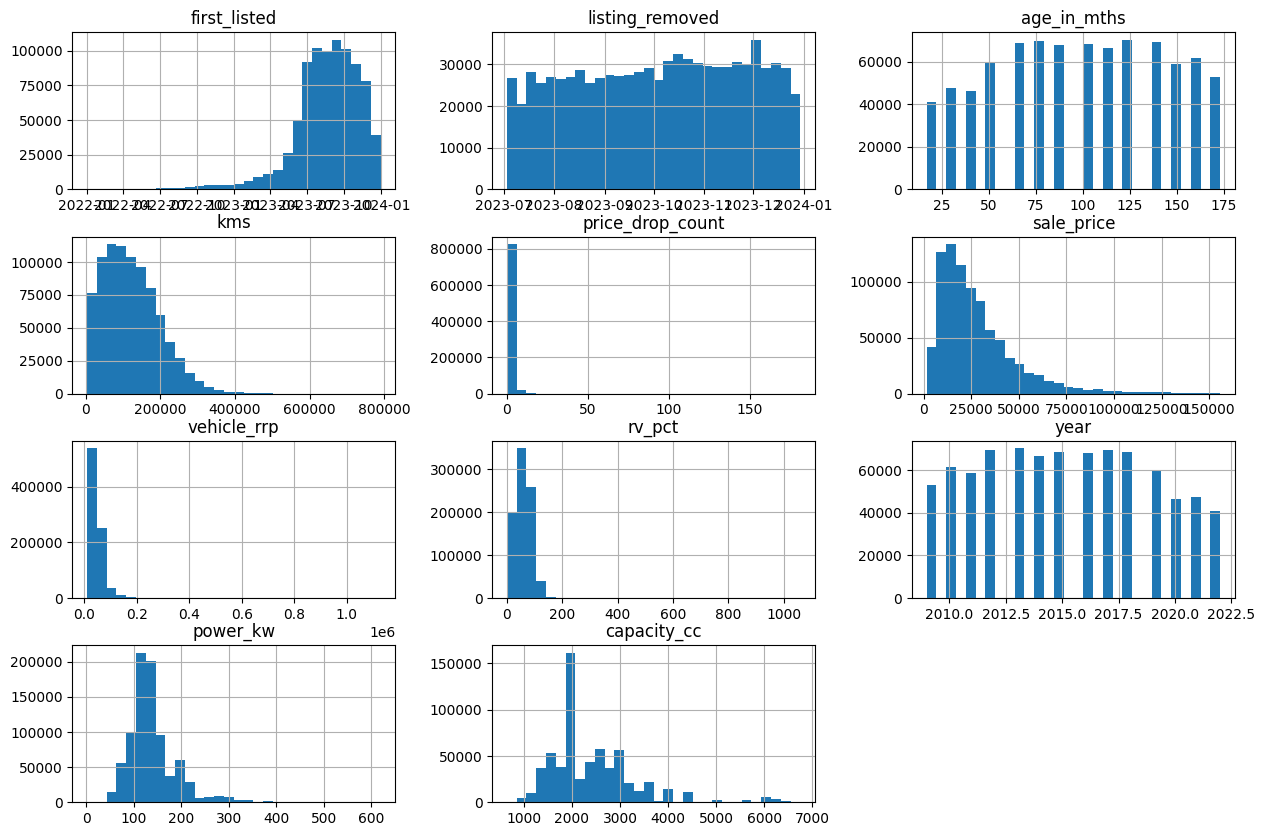

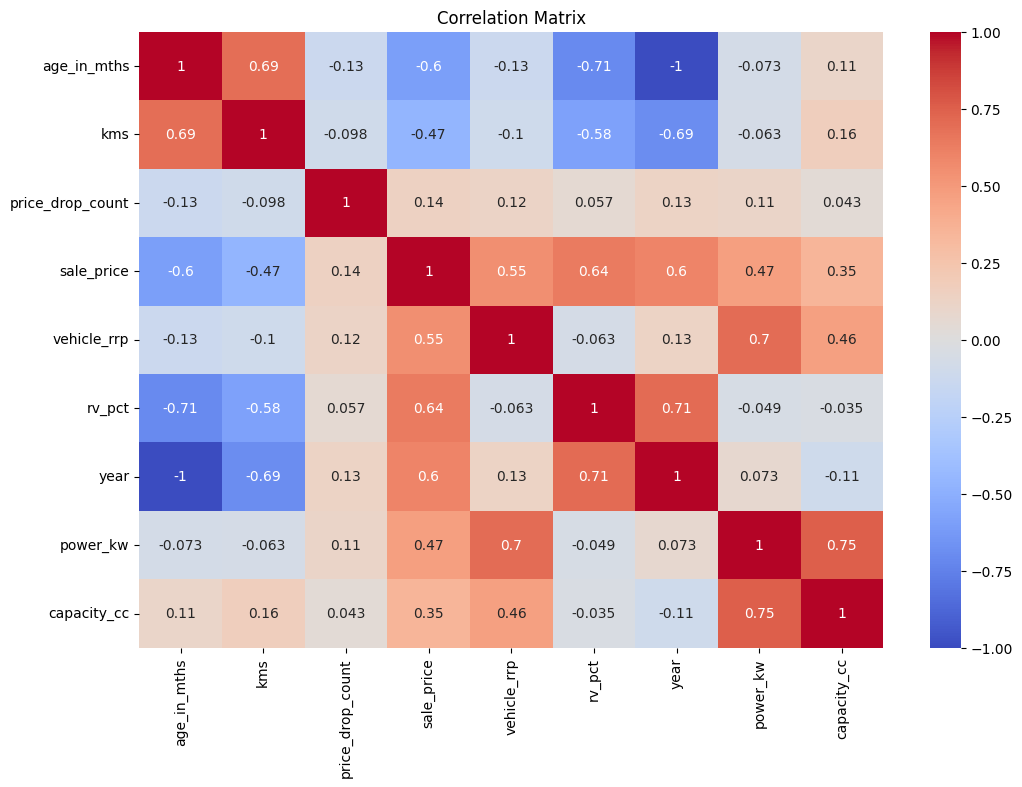

In [16]:
# 4. Data visualization


#Histograms for numerical columns

vehicle_data_cleaned.hist(bins=30, figsize=(15, 10))
plt.show()



# Select only numeric columns for correlation calculation
numeric_cols = vehicle_data_cleaned.select_dtypes(include=['float64', 'int64'])

# Correlation matrix
correlation_matrix = numeric_cols.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

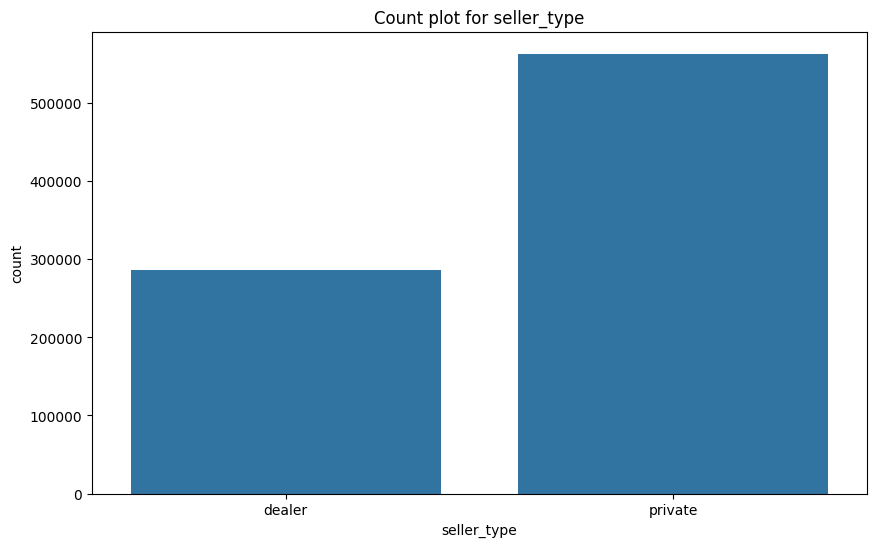

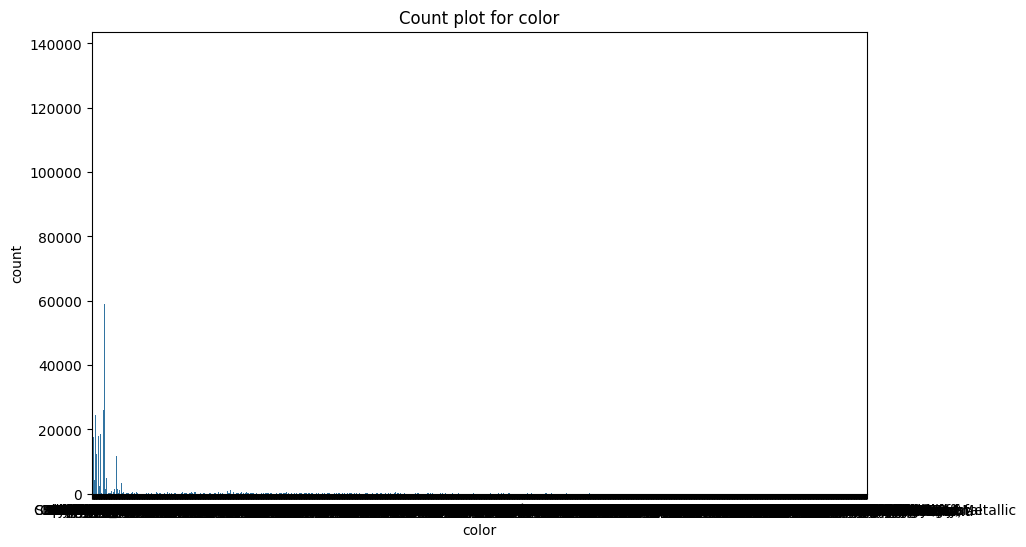

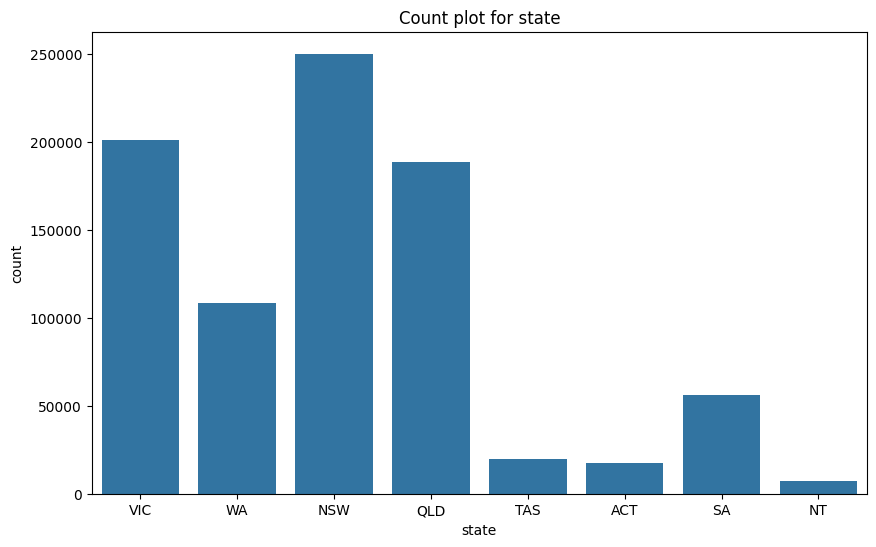

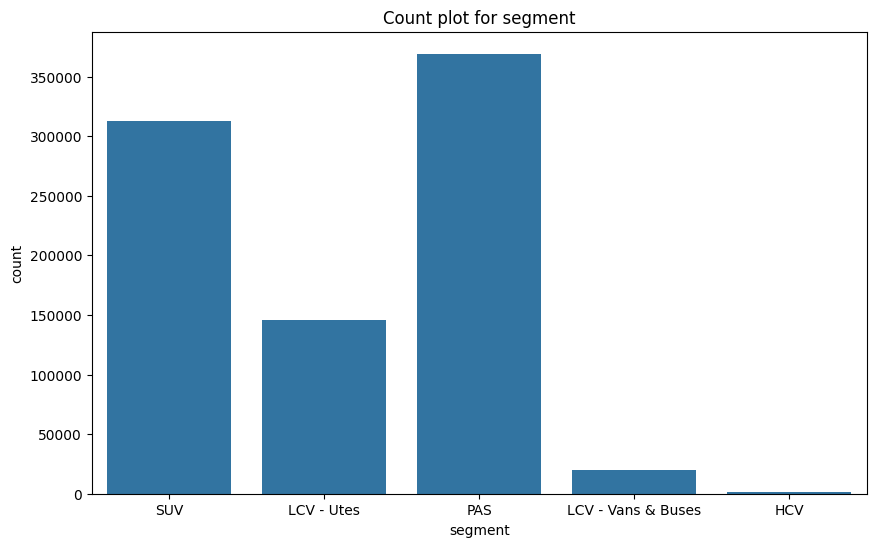

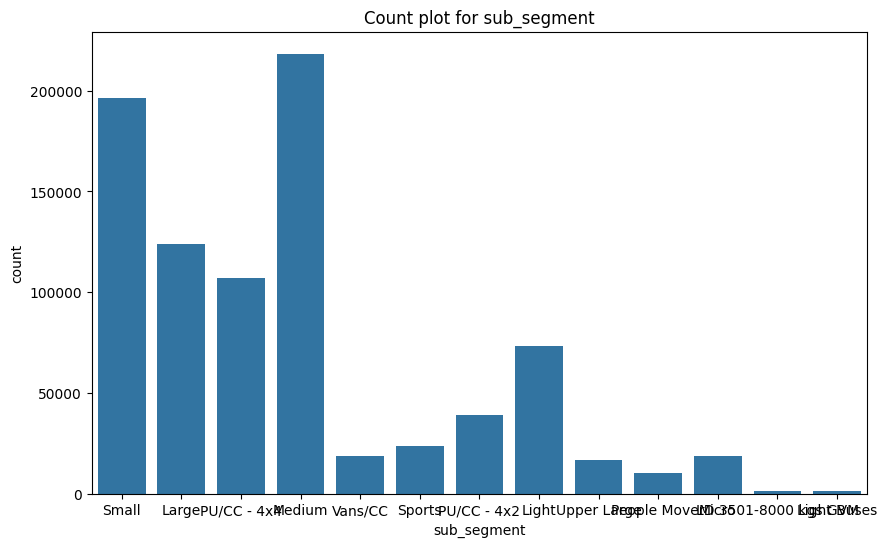

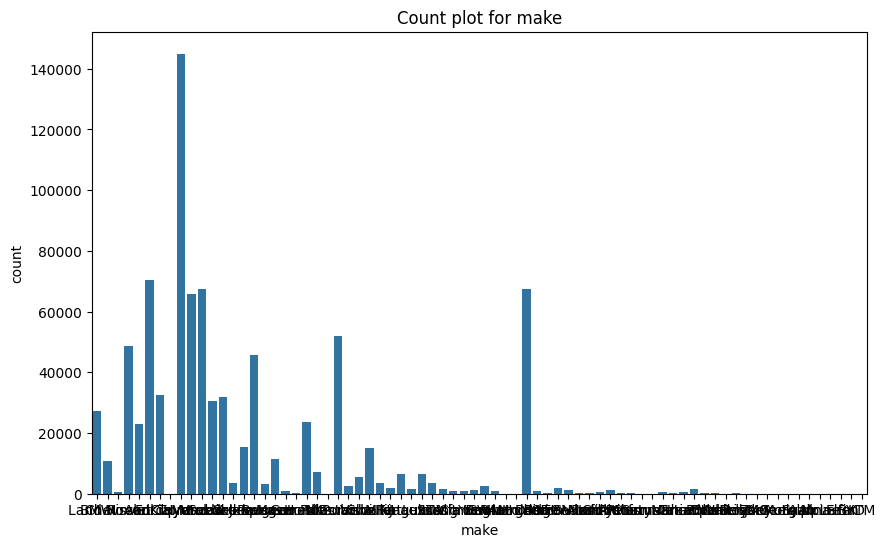

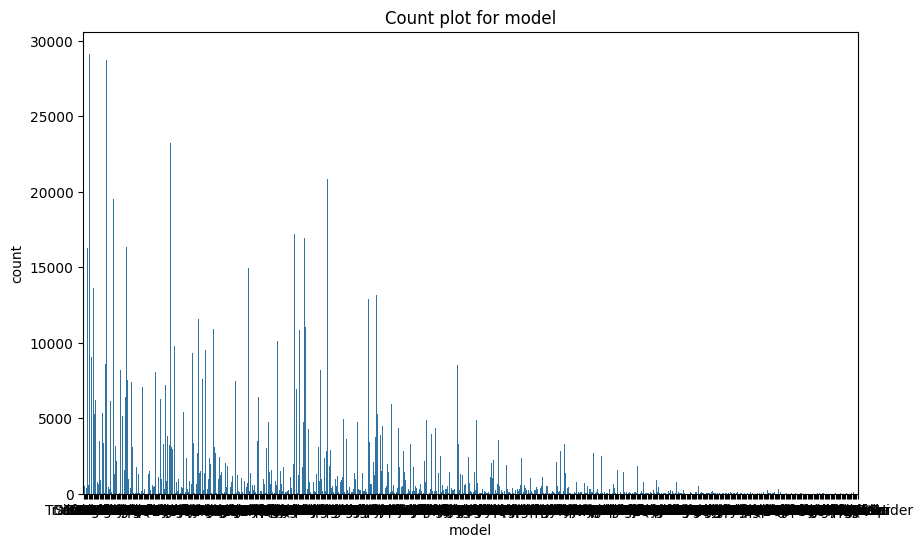

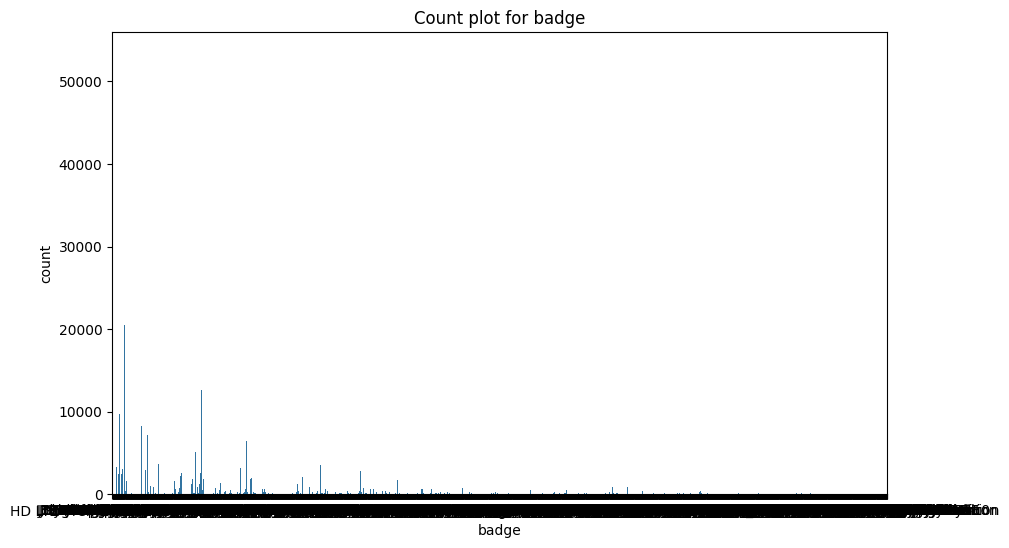

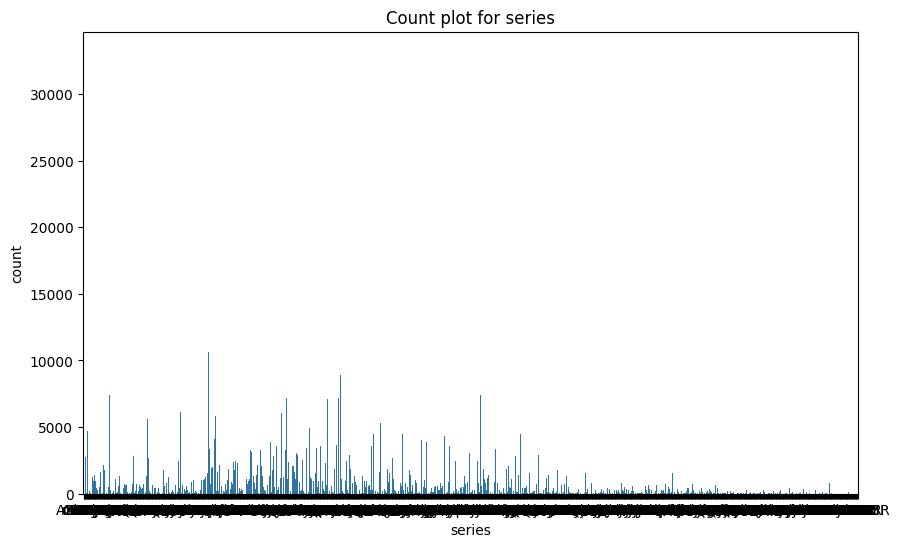

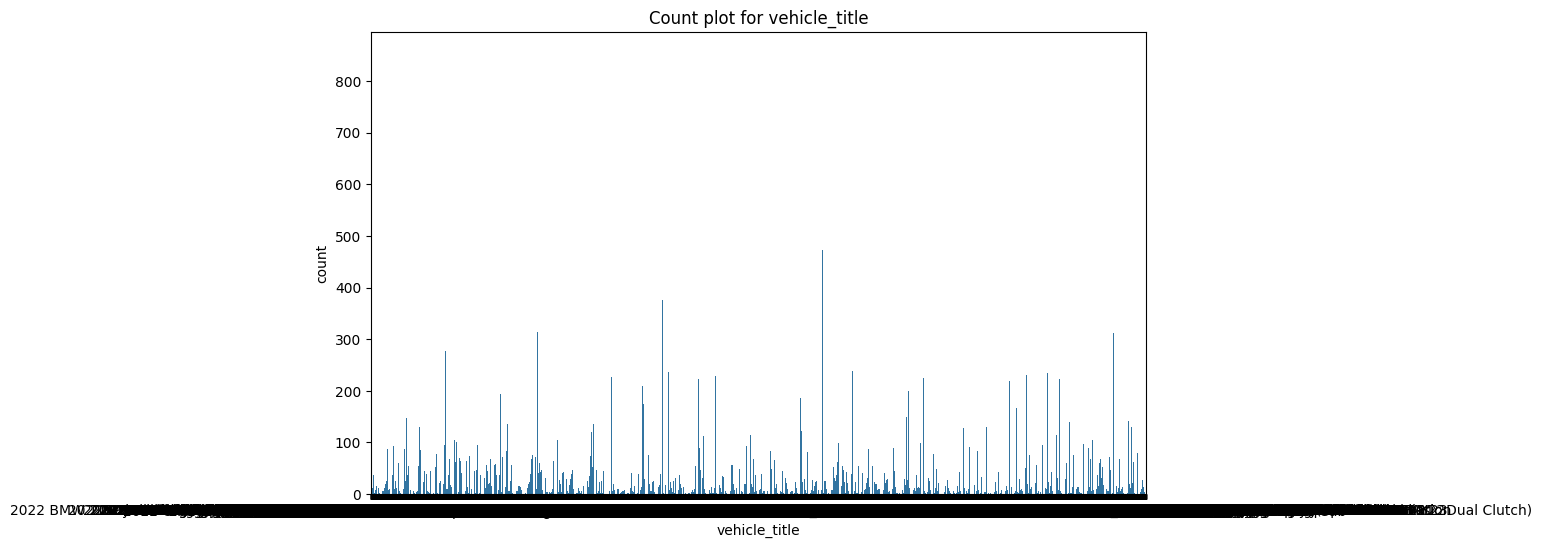

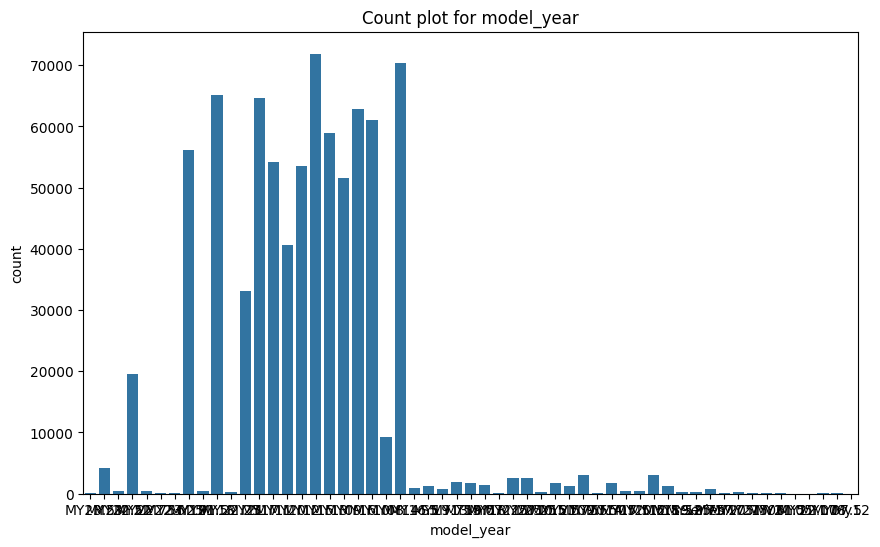

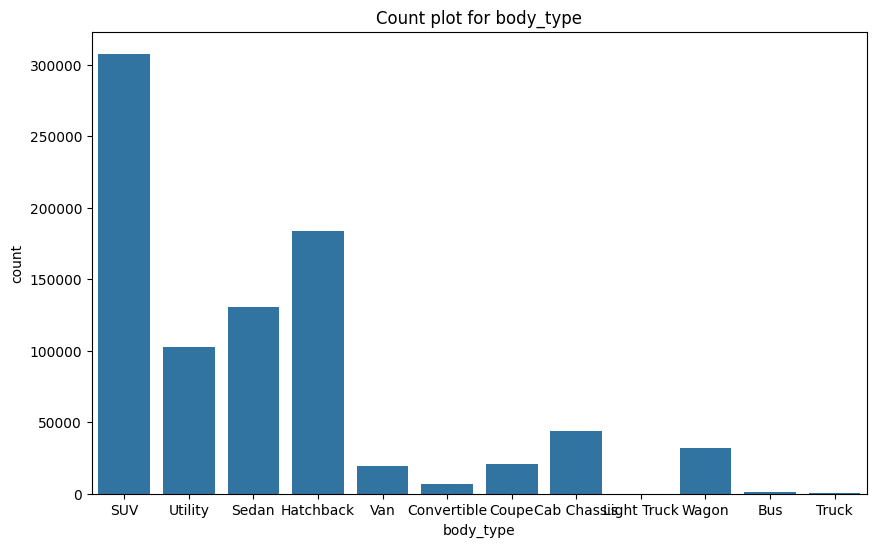

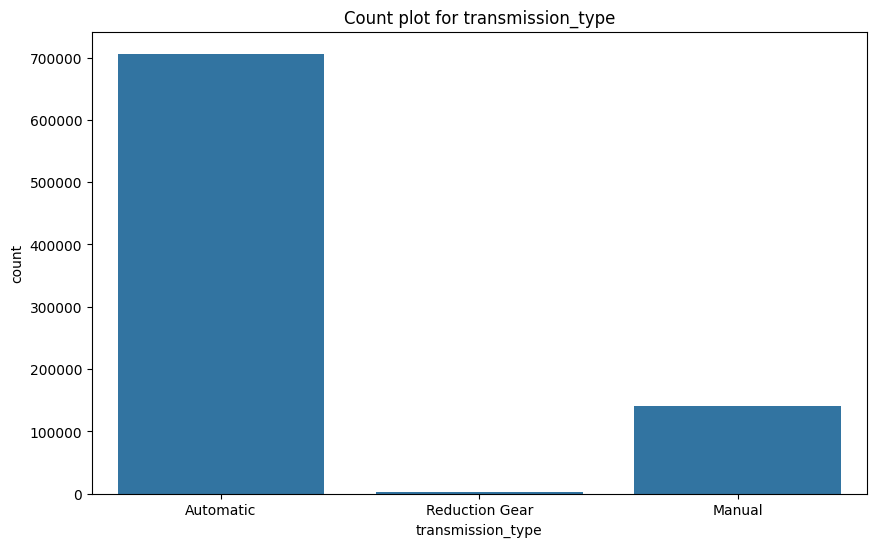

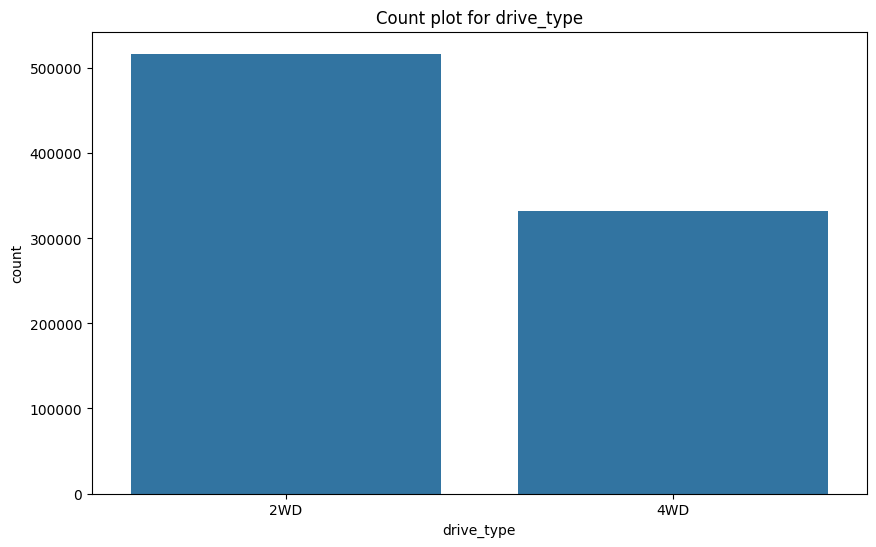

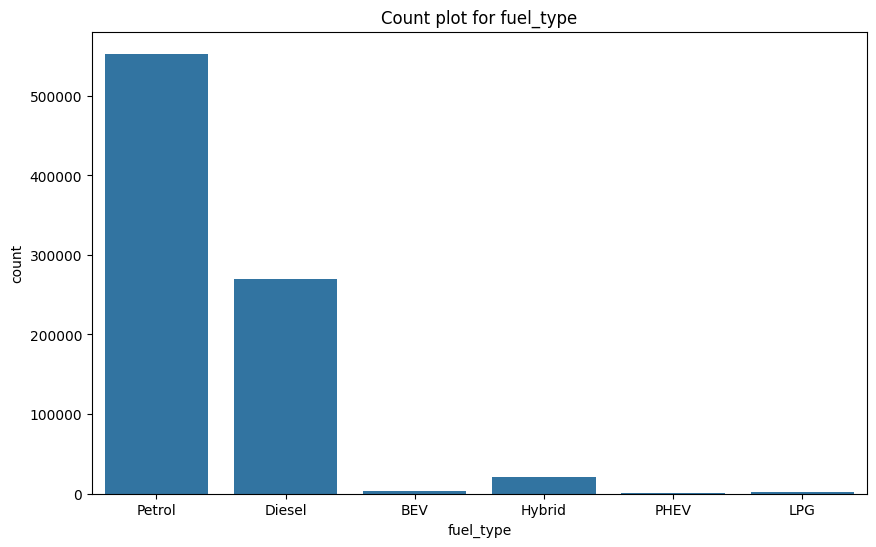

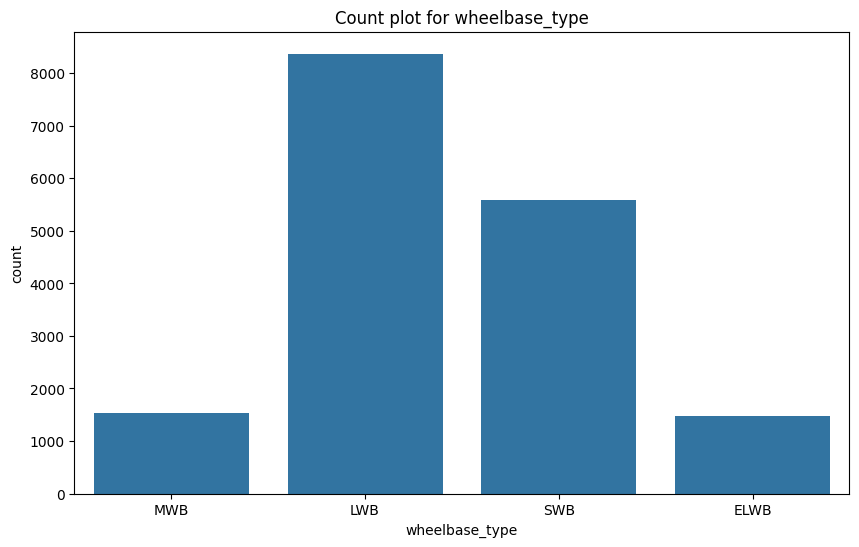

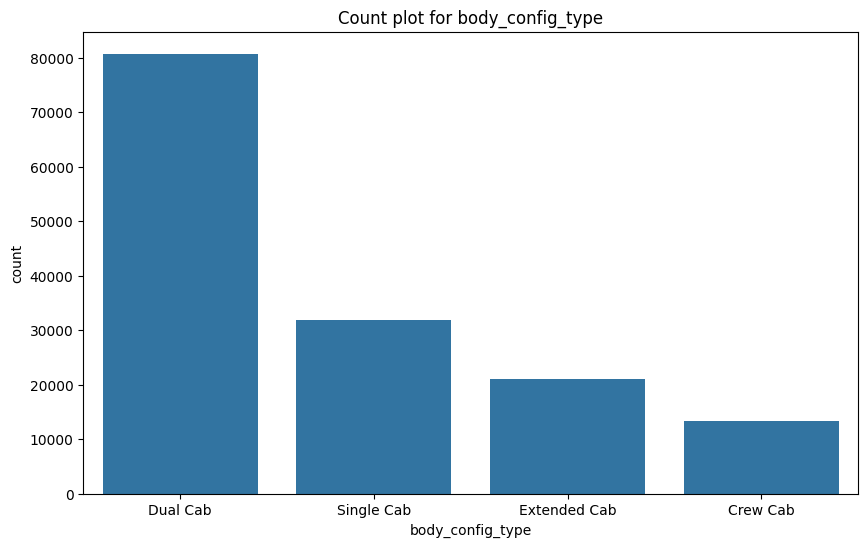

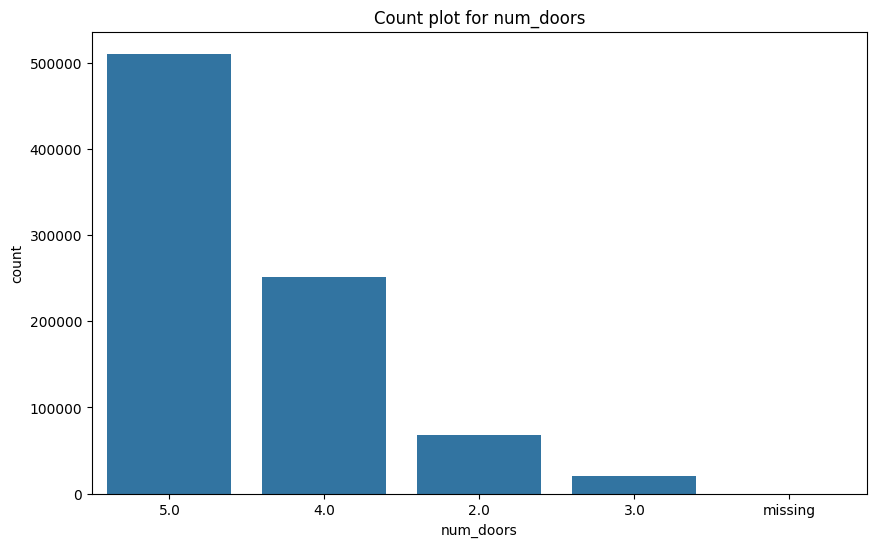

In [17]:
# 5. Categorical data analysis
# Count plots for categorical variables
categorical_columns = vehicle_data_cleaned.select_dtypes(include=['object']).columns
for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=vehicle_data_cleaned, x=col)
    plt.title(f'Count plot for {col}')
    plt.show()

In [18]:
# 6. Feature Engineering


In [19]:
# days in market
vehicle_data_cleaned['days_on_market'] = vehicle_data_cleaned['listing_removed'] - vehicle_data_cleaned['first_listed']
# Convert 'days_on_market' to integer
vehicle_data_cleaned['days_on_market'] = vehicle_data_cleaned['days_on_market'].dt.days



vehicle_data_cleaned['days_on_market'] 

/var/folders/93/pnfdwlvs48sb42_cx9w88ltc0000gn/T/ipykernel_50631/752521994.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vehicle_data_cleaned['days_on_market'] = vehicle_data_cleaned['listing_removed'] - vehicle_data_cleaned['first_listed']
/var/folders/93/pnfdwlvs48sb42_cx9w88ltc0000gn/T/ipykernel_50631/752521994.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vehicle_data_cleaned['days_on_market'] = vehicle_data_cleaned['days_on_market'].dt.days


0         85
1         43
2         88
3         64
4         78
          ..
862539    52
862540    42
862541    63
862542    18
862543    18
Name: days_on_market, Length: 848905, dtype: int64

In [21]:
# Create a new column by combining 'model', 'series', and 'badge'
vehicle_data_cleaned['make_model_series_badge'] = vehicle_data_cleaned['make'].astype(str) + '_' + vehicle_data_cleaned['model'].astype(str) + '_' + vehicle_data_cleaned['series'].astype(str) + '_' + vehicle_data_cleaned['badge'].astype(str)


# Calculate the mean sale price for each unique value in 'make_model_series_badge', only include most recent 50 transactions for each make_model_series_badge to take account of recency
vehicle_data_cleaned.sort_values(by=['make_model_series_badge','first_listed'], ascending=False, inplace=True)
mean_sale_price = vehicle_data_cleaned.groupby('make_model_series_badge').head(50)[['make_model_series_badge', 'sale_price']].groupby('make_model_series_badge').mean().reset_index()
mean_sale_price.columns = ['make_model_series_badge', 'mean_sale_price_make_model_series_badge']

# Merge the mean sale price back to the original dataframe
vehicle_data_cleaned = vehicle_data_cleaned.merge(mean_sale_price, on='make_model_series_badge', how='left')

# Verify the new feature
print(vehicle_data_cleaned[['make_model_series_badge', 'mean_sale_price_make_model_series_badge']].head())



# Verify the modifications
print(vehicle_data_cleaned.info())
print(vehicle_data_cleaned.head())

/var/folders/93/pnfdwlvs48sb42_cx9w88ltc0000gn/T/ipykernel_50631/1949027241.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vehicle_data_cleaned['make_model_series_badge'] = vehicle_data_cleaned['make'].astype(str) + '_' + vehicle_data_cleaned['model'].astype(str) + '_' + vehicle_data_cleaned['series'].astype(str) + '_' + vehicle_data_cleaned['badge'].astype(str)
/var/folders/93/pnfdwlvs48sb42_cx9w88ltc0000gn/T/ipykernel_50631/1949027241.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vehicle_data_cleaned.sort_values(by=['make_model_series_badge','first_l

                    make_model_series_badge  \
0  smart_Fortwo_C451_52KW mhd Final Edition   
1  smart_Fortwo_C451_52KW mhd Final Edition   
2  smart_Fortwo_C451_52KW mhd Final Edition   
3  smart_Fortwo_C451_52KW mhd Final Edition   
4  smart_Fortwo_C451_52KW mhd Final Edition   

   mean_sale_price_make_model_series_badge  
0                                  13986.0  
1                                  13986.0  
2                                  13986.0  
3                                  13986.0  
4                                  13986.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 848905 entries, 0 to 848904
Data columns (total 34 columns):
 #   Column                                   Non-Null Count   Dtype         
---  ------                                   --------------   -----         
 0   first_listed                             848905 non-null  datetime64[ns]
 1   listing_removed                          848905 non-null  datetime64[ns]
 2   seller_type        

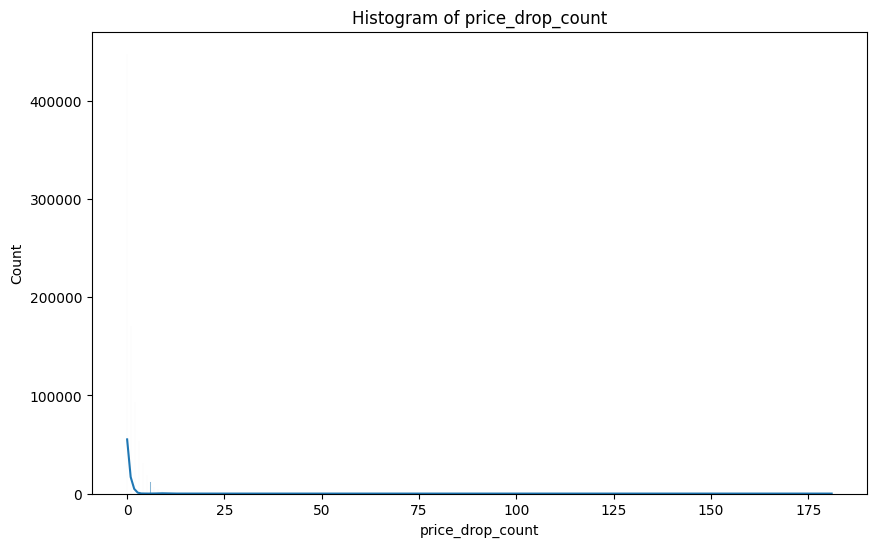

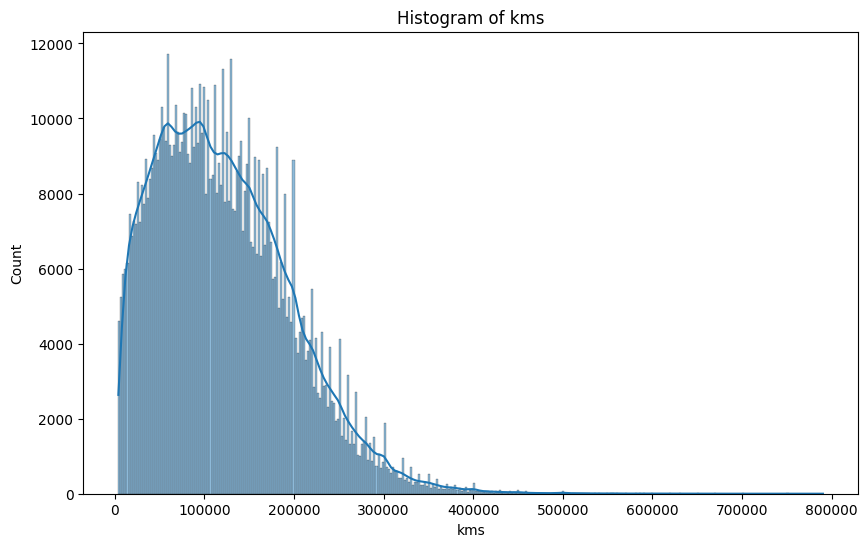

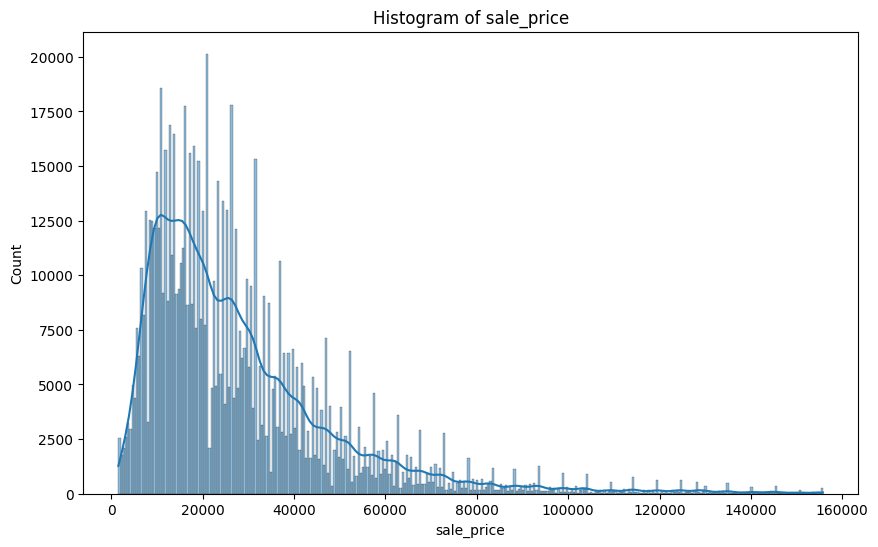

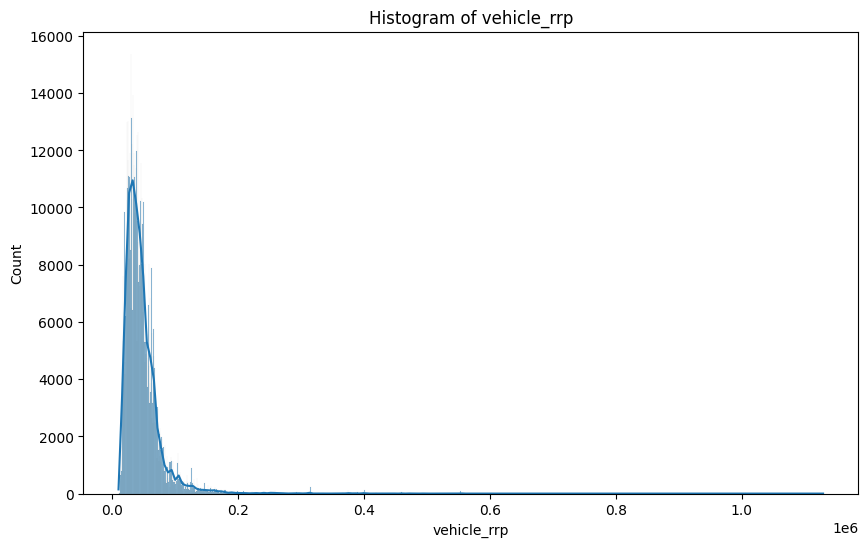

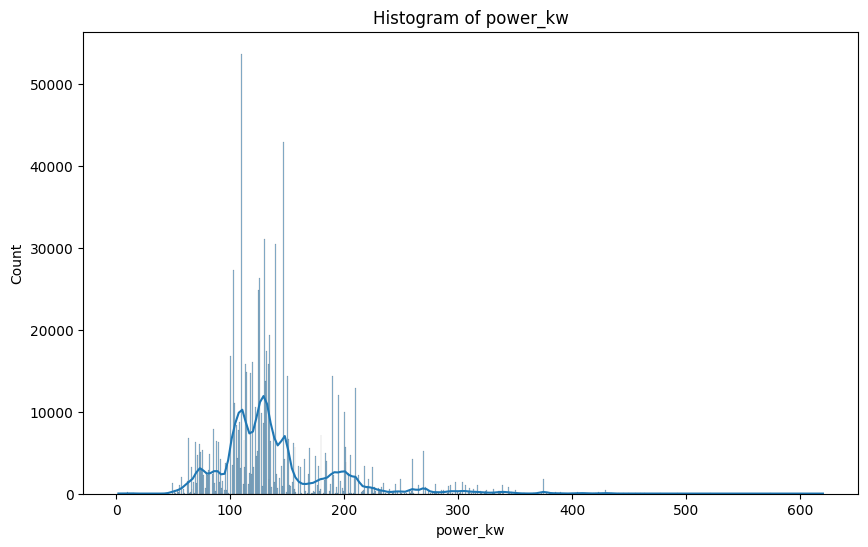

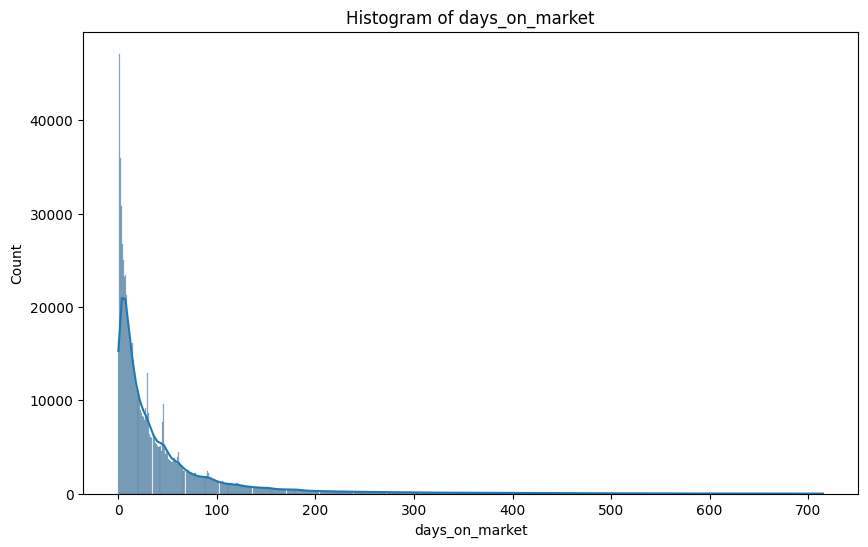

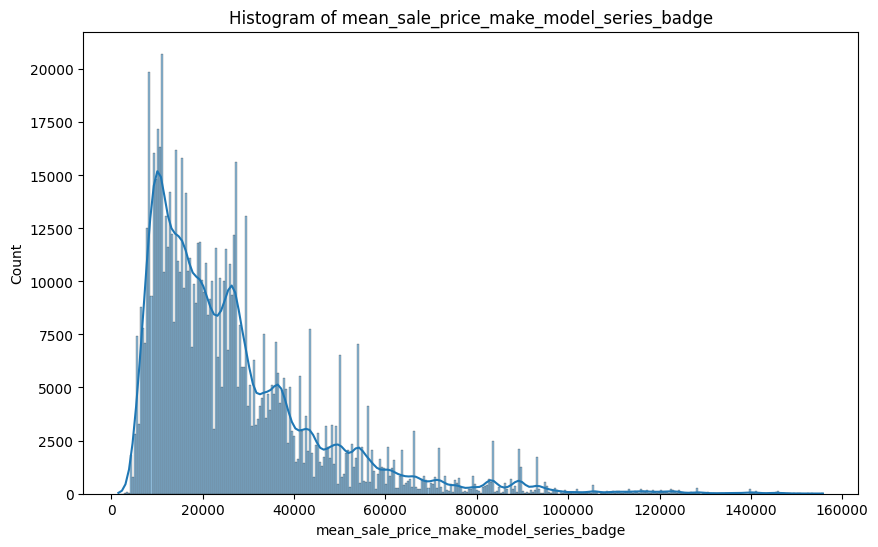

price_drop_count                           5.352631
kms                                        0.826418
sale_price                                 1.997759
vehicle_rrp                                5.443439
power_kw                                   1.836188
days_on_market                             3.397717
mean_sale_price_make_model_series_badge    1.932632
dtype: float64


In [22]:

# List of columns to check for skewness
columns_to_check = ['price_drop_count', 'kms', 'sale_price', 'vehicle_rrp', 'power_kw', 'days_on_market', 'mean_sale_price_make_model_series_badge']

# Function to plot histograms
def plot_histograms(df, columns):
    for column in columns:
        plt.figure(figsize=(10, 6))
        sns.histplot(df[column].dropna(), kde=True)
        plt.title(f'Histogram of {column}')
        plt.show()

# Function to calculate skewness
def calculate_skewness(df, columns):
    skewness = df[columns].skew()
    print(skewness)
    return skewness

# Plot histograms to visualize distributions
plot_histograms(vehicle_data_cleaned, columns_to_check)

# Calculate skewness to identify highly skewed columns
skewness = calculate_skewness(vehicle_data_cleaned, columns_to_check)

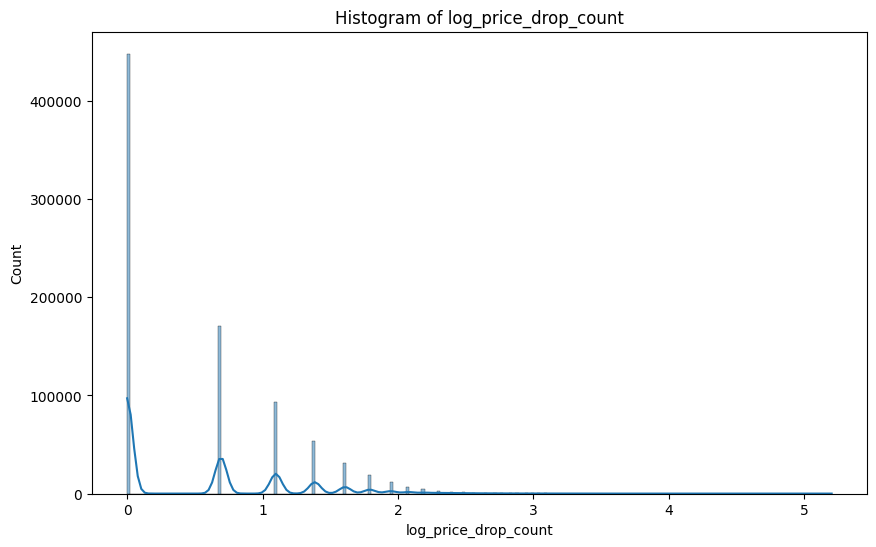

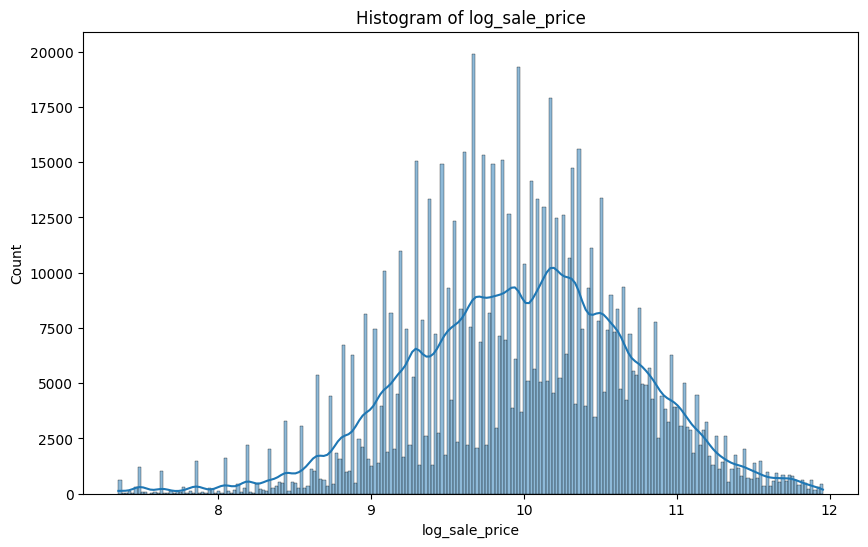

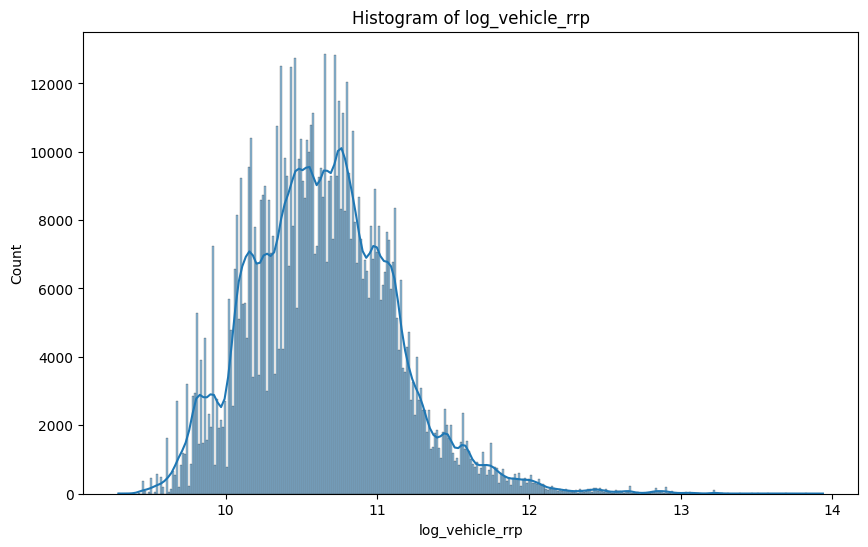

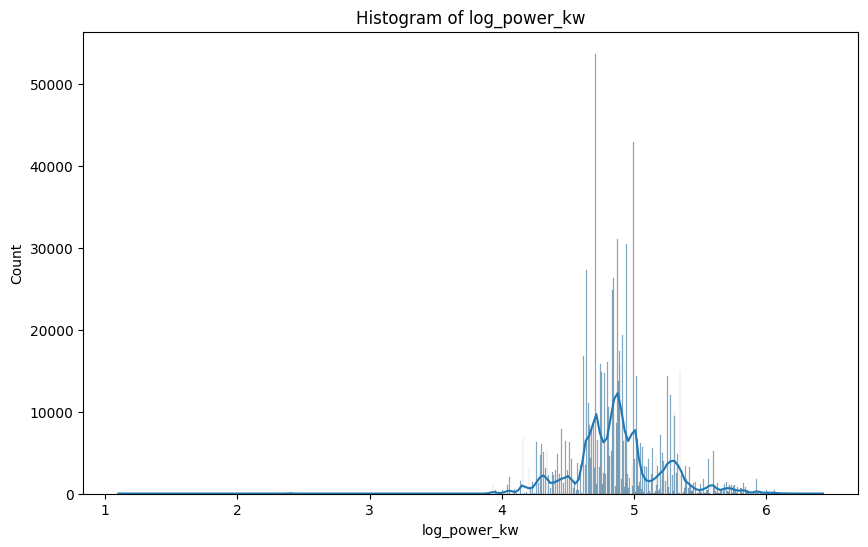

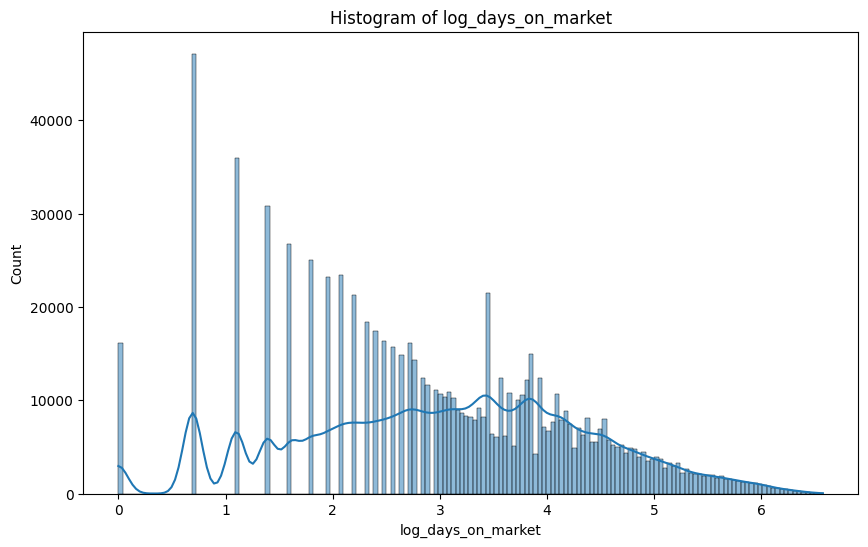

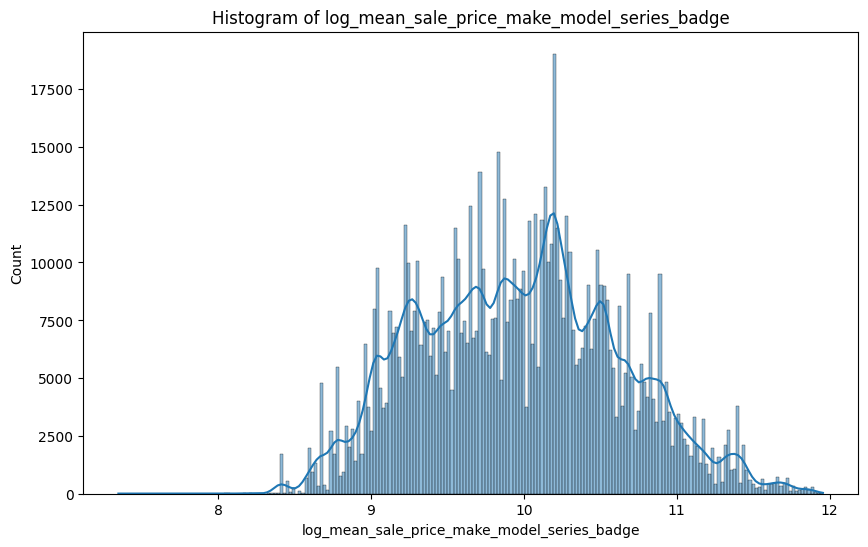

In [23]:
# Apply log transformation to highly skewed columns
# Threshold for skewness can be set, e.g., |skewness| > 1
columns_to_transform = skewness[abs(skewness) > 1].index

for column in columns_to_transform:
    vehicle_data_cleaned[f'log_{column}'] = np.log1p(vehicle_data_cleaned[column])  # log1p to handle zero values

# Verify the transformation
plot_histograms(vehicle_data_cleaned, [f'log_{col}' for col in columns_to_transform])

In [24]:
# all good, decided to keep the log transformed columns
log_skewness = vehicle_data_cleaned[[f'log_{col}' for col in columns_to_transform]].skew()
print("Skewness of log-transformed columns:\n", log_skewness)

Skewness of log-transformed columns:
 log_price_drop_count                           0.974981
log_sale_price                                -0.219928
log_vehicle_rrp                                0.569250
log_power_kw                                   0.140744
log_days_on_market                            -0.090819
log_mean_sale_price_make_model_series_badge    0.149302
dtype: float64


In [25]:
#find out all numerical and categorical columns
numerical_columns = vehicle_data_cleaned.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = vehicle_data_cleaned.select_dtypes(include=['object','category']).columns

# number of unique values in each of categorical columns
vehicle_data_cleaned[categorical_columns].nunique()

seller_type                    2
color                       2631
state                          8
segment                        5
sub_segment                   13
make                          74
model                        635
badge                       3068
series                      1112
vehicle_title              29526
model_year                    55
body_type                     12
transmission_type              3
drive_type                     2
fuel_type                      6
wheelbase_type                 4
body_config_type               4
num_doors                      5
num_seats                     12
num_gears                      9
make_model_series_badge     6648
dtype: int64

In [26]:
vehicle_data_cleaned['color']

0              White
1              black
2              black
3              white
4         Deep Black
             ...    
848900          Grey
848901         black
848902         black
848903         black
848904         white
Name: color, Length: 848905, dtype: object

In [27]:

# Define a color mapping dictionary
color_mapping = {
    'Black': 'Black', 'White': 'White', 'Red': 'Red', 'Blue': 'Blue', 'Green': 'Green',
    'Yellow': 'Yellow', 'Orange': 'Orange', 'Purple': 'Purple', 'Brown': 'Brown', 'Grey': 'Grey', 'Aluminium': 'Silver', 'Bronze': 'Brown', 
    'Silver': 'Silver', 'Gold': 'Gold', 'Beige': 'Beige', 'Maroon': 'Maroon',
    'missing': 'Other',
    'Forged Copper': 'Brown',
    'Other': 'Other',
    'Magnetic Force': 'Grey',
    'burgundy': 'Maroon',
    'Granite Crystal': 'Grey',
    'Magnetic': 'Grey',
    'charcoal': 'Black',
    'Crystal Pearl': 'White',
    'Graphite': 'Grey',
    'Thunder': 'Grey',
    'other': 'Other',
    'Panthera Metal': 'Grey',
    'Magnetic Tech': 'Grey',
    'Robust Emerald': 'Green',
    'Steel Graphite': 'Grey',
    'Gun Metallic': 'Grey',
    'Ivory Pearl': 'White',
    'Scarlet Ember': 'Red',
    'Atomic Rush': 'Red',
    'Grigio': 'Grey',
    'French Vanilla': 'Beige',
    'Swp': 'White',
    'Dive in Jeju': 'Blue',
    'Sonic Quartz': 'Grey',
    'Coral Rose': 'Red',
    'Thundernight': 'Purple',
    'Iridescent Pearl': 'White',
    'Titanium': 'Grey',
    'Ebony Leather # 2': 'Black',
    'BURGUNDY': 'Maroon',
    'Moonscape': 'Grey',
    'Bright Dusk': 'Grey',
    'Ebony DuoLeather-Mar': 'Black',
    'Nocturne Gray': 'Grey',
    'Crayon': 'Grey',
    'LE': 'Other',
    'Platinum Graphite': 'Grey',
    'Makena Turquoise Metallic': 'Blue',
    'Fluid Metal': 'Grey',
    'Vibrant Violet': 'Purple',
    'Verde Montreal': 'Green',
    'Chiffon Ivory': 'Beige',
    'Cream': 'Beige',
    'turquoise': 'Blue',
    'Burgundy': 'Maroon',
    'Storm Bay': 'Grey',
    'Jungle Khaki': 'Green',
    'Ceramic': 'White',
    'Dark Knight': 'Black',
    'magenta': 'Purple',
    'Modern Steel': 'Grey',
    'Liquid Mercury': 'Grey',
    'tan': 'Beige',
    'pink': 'Red',
    'Phantom': 'Black',
    'Voodoo': 'Black',
    'Ebony': 'Black',
    'Moonstone': 'Grey',
    'Nitrate': 'Grey',
    'Dark Gun Metal': 'Grey',
    'Dark Shadow': 'Grey',
    'Starlight': 'White',
    'Volcanic Amber': 'Orange',
    'Nero': 'Black',
    'Onyx': 'Black',
    'Sunstone': 'Red',
    'Ink': 'Black',
    'Moonlight Cloud': 'Blue',
    'Leather': 'Black',
    'Sierra Burgundy': 'Maroon',
    'Prussian Steel': 'Grey',
    'Gator': 'Green',
    'Son of a Gun': 'Grey',
    'Tank': 'Green',
    'Sandy Taupe': 'Beige',
    'Midnight Sky': 'Blue',
    'undefined': 'Other',
    'Ipanema Sand': 'Beige',
    'Splash': 'Blue',
    'Platinum': 'Silver',
    'Petroleum': 'Green',
    'Swift': 'Grey',
    'Cobalt Mica': 'Blue',
    'Khaki Metal': 'Green',
    'Silhouette': 'Grey',
    'Emperor': 'Black',
    'Havana': 'Brown',
    'Lightning Strike': 'Grey',
    'Smoke': 'Grey',
    'Vanish': 'Grey',
    'Mint Milkshake': 'Green',
    'Cherry': 'Red',
    'Titanium Flash': 'Grey',
    'Deep Cherry': 'Red',
    'Maximum Steel': 'Grey',
    'Nero Scorpione': 'Black',
    'Wildfire': 'Red',
    'Karma': 'Red',
    'Latte': 'Beige',
    'bordeaux': 'Maroon',
    'Carbon Schwarz': 'Black',
    'Hot Chocolate': 'Brown',
    'Blanc Banquise': 'White',
    'Azure Gray': 'Grey',
    'Fire Opal': 'Red',
    'Stormy Sea': 'Blue',
    'Graphite Lustre': 'Grey',
    'Pink': 'Red',
    'Inferno': 'Red',
    'Alpine': 'White',
    'Sizzle': 'Red',
    'Terra Rossa': 'Red',
    'Mulberry': 'Purple',
    'Graphite Shadow': 'Grey',
    'Sonic Chrome': 'Grey',
    'Blade': 'Grey',
    'Heron': 'Grey',
    'Steel Blonde': 'Grey',
    'Carbon Flash': 'Black',
    'Poison Ivy': 'Green',
    'Arctic Frost': 'White',
    'Prague Nightshade': 'Purple',
    'Std': 'Other',
    'Desert Sand': 'Beige',
    'Polished Metal': 'Grey',
    'Regal Peacock': 'Blue',
    'Hazel': 'Brown',
    'Vitamin C': 'Orange',
    'Amazon Gray': 'Grey',
    'Charcoal': 'Black',
    'Carbon Steel': 'Grey',
    'Fuji Graphite': 'Grey',
    'Mercury': 'Grey',
    'Platinum Quartz': 'Silver',
    'Indigo': 'Blue',
    'Dark Charcoal': 'Black',
    'Sting': 'Grey',
    'Evoke': 'Grey',
    'Kinetic': 'Blue',
    'Nightshade': 'Purple',
    'Noir Perla Nera': 'Black',
    'Shadow Platinum': 'Grey',
    'Havanna': 'Brown',
    'Atomic Metallic': 'Grey',
    'Hazard': 'Yellow',
    'Luminous Sand': 'Beige',
    'Anvil': 'Grey',
    'Sapphire': 'Blue',
    'Moonlight': 'Grey',
    'Blu Passione': 'Blue',
    'Grigio Maratea': 'Grey',
    'Gris Shark': 'Grey',
    'Vision': 'Grey',
    'Bumpers': 'Other',
    'Crystal Mist': 'Grey',
    'Magenta': 'Purple',
    'Metal Stream': 'Grey',
    'Squeeze': 'Yellow',
    'Seashell': 'Beige',
    'Chlorophyll': 'Green',
    'Glacier Lake': 'Blue',
    'Smokey Eye': 'Grey',
    'Snowflake Pearl': 'White',
    'Sunburst': 'Yellow',
    'Cool Siver': 'Silver',
    'LA Lilac': 'Purple',
    'Monaco Platinum': 'Silver',
    'Champagne': 'Beige',
    'Rain Forest': 'Green',
    'Glittering Metal': 'Grey',
    'Vixen': 'Red',
    'Sparkling Metal': 'Grey',
    'Northern Lights Violet': 'Purple',
    'Moulin Rouge': 'Red',
    'Midnight Forest': 'Green',
    'Fantale': 'Orange',
    'Vermillion': 'Red',
    'Metallic Silk': 'Grey',
    'Lunar Sky': 'Blue',
    'Aura': 'Blue',
    'Urban Titanium': 'Grey',
    'Sunset': 'Orange',
    'Alchemy': 'Other',
    'Electric Teal': 'Blue',
    'Sand Storm': 'Beige',
    'Grigio Granito': 'Grey',
    'Rosso': 'Red',
    'Mocha': 'Brown',
    'Deep Sapphire': 'Blue',
    'Gondwana Stone': 'Grey',
    'Ironbark': 'Brown',
    'Cashmere': 'Beige',
    'Vanilla Ice Cream': 'White',
    'Commando': 'Green',
    'Rock Lobster': 'Red',
    'Moulan Rouge': 'Red',
    'Sunflower': 'Yellow',
    'Sunset Copper': 'Brown',
    'Edge': 'Grey',
    'Gunmetal': 'Grey',
    'Indigo Lights': 'Blue',
    'Caliente': 'Red',
    'Noir Obsidien': 'Black',
    'Bianco': 'White',
    'Cappuccino': 'Beige',
    'Aruba': 'Green',
    'Conquer': 'Grey',
    'Copper': 'Brown',
    'Atlantis Turquoise': 'Blue',
    'Sonic Titanium': 'Grey',
    'Hyper Metallic': 'Grey',
    'Turquoise': 'Blue',
    'Fortune Rose': 'Red',
    'Flint': 'Grey',
    'Snow Storm': 'White',
    'Twilight': 'Grey',
    'Sparkling Meteor': 'Grey',
    'Fresh Lime': 'Green',
    '20': 'Other',
    'Saber': 'Other',
    'Dark Sapphire': 'Blue',
    'Mahogany': 'Brown',
    'Lapis Lazuli': 'Blue',
    'Sandstone': 'Beige',
    'Dark Furnace': 'Brown',
    'Liquid Metal': 'Grey',
    'Sovereign': 'Grey',
    'Dragon': 'Red',
    'Sepia': 'Brown',
    'Viper': 'Red',
    'Ruby Wine': 'Red',
    'Dark Gray Metallic': 'Grey',
    'Designo - Graphite': 'Grey',
    
}

# Function to extract the main color with case-insensitive matching
def extract_main_color(color, color_mapping):
    color_lower = color.lower()  # Convert the color to lower case for case insensitive matching
    for keyword, main_color in color_mapping.items():
        if keyword.lower() in color_lower:
            return main_color
    return 'Other'  # Default for colors not found in the mapping

# Apply the function to the color column
vehicle_data_cleaned['main_color'] = vehicle_data_cleaned['color'].apply(lambda x: extract_main_color(x, color_mapping))

# Verify the transformation
print(vehicle_data_cleaned[['color', 'main_color']].head())



# Verify the modifications
print(vehicle_data_cleaned.info())
print(vehicle_data_cleaned.head())


        color main_color
0       White      White
1       black      Black
2       black      Black
3       white      White
4  Deep Black      Black
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 848905 entries, 0 to 848904
Data columns (total 41 columns):
 #   Column                                       Non-Null Count   Dtype         
---  ------                                       --------------   -----         
 0   first_listed                                 848905 non-null  datetime64[ns]
 1   listing_removed                              848905 non-null  datetime64[ns]
 2   seller_type                                  848905 non-null  object        
 3   age_in_mths                                  848905 non-null  int64         
 4   kms                                          848905 non-null  int64         
 5   color                                        848905 non-null  object        
 6   state                                        848905 non-null  object        
 

In [28]:
# count value and occurance of each color
vehicle_data_cleaned['main_color'].value_counts()

main_color
White     298688
Grey      130038
Black     116145
Silver    110220
Blue       75139
Red        54383
Other      25424
Brown       7564
Green       6899
Orange      5949
Gold        5806
Beige       4380
Maroon      3612
Yellow      3314
Purple      1344
Name: count, dtype: int64

In [29]:
# proof of more than 1 rrp for the same make_model_series_badge

# Group by 'make_model_series_badge' and count unique 'vehicle_rrp' values in each group
vehicle_rrp_unique_counts = vehicle_data_cleaned.groupby('make_model_series_badge')['vehicle_rrp'].nunique().reset_index()
vehicle_rrp_unique_counts.columns = ['make_model_series_badge', 'unique_rrp_count']

# Identify groups where 'vehicle_rrp' is not the same (i.e., unique_rrp_count > 1)
inconsistent_rrp_groups = vehicle_rrp_unique_counts[vehicle_rrp_unique_counts['unique_rrp_count'] > 1]

# Display the results
print(f"Number of groups with inconsistent 'vehicle_rrp': {len(inconsistent_rrp_groups)}")
print(inconsistent_rrp_groups)

# Optionally, display some examples of these inconsistent groups
if not inconsistent_rrp_groups.empty:
    inconsistent_examples = vehicle_data_cleaned[vehicle_data_cleaned['make_model_series_badge'].isin(inconsistent_rrp_groups['make_model_series_badge'])].sort_values(by='make_model_series_badge')
    print(inconsistent_examples[['make_model_series_badge', 'vehicle_rrp']].head(20))


Number of groups with inconsistent 'vehicle_rrp': 4424
                  make_model_series_badge  unique_rrp_count
3        Abarth_595_Series 3_Competizione                 5
4             Abarth_595_Series 3_Turismo                 3
5             Abarth_595_Series 3_missing                 3
6        Abarth_595_Series 4_Competizione                 4
8             Abarth_595_Series 4_missing                 4
...                                   ...               ...
6633       Volvo_XC90_missing_T6 R-Design                 7
6635       Volvo_XC90_missing_T8 R-Design                 4
6642  ZX Auto_Grand Tiger_missing_missing                 6
6643               smart_Fortwo_451_pulse                 2
6644           smart_Fortwo_451_pulse mhd                 2

[4424 rows x 2 columns]
                 make_model_series_badge  vehicle_rrp
848875  Abarth_595_Series 3_Competizione      40793.0
848857  Abarth_595_Series 3_Competizione      40793.0
848858  Abarth_595_Series 3_Competizio

In [30]:
# number of unique values in each of categorical columns
vehicle_data_cleaned.columns

Index(['first_listed', 'listing_removed', 'seller_type', 'age_in_mths', 'kms',
       'color', 'state', 'price_drop_count', 'sale_price', 'vehicle_rrp',
       'rv_pct', 'segment', 'sub_segment', 'make', 'model', 'year', 'badge',
       'series', 'vehicle_title', 'model_year', 'body_type',
       'transmission_type', 'drive_type', 'fuel_type', 'wheelbase_type',
       'body_config_type', 'power_kw', 'num_doors', 'num_seats', 'num_gears',
       'capacity_cc', 'days_on_market', 'make_model_series_badge',
       'mean_sale_price_make_model_series_badge', 'log_price_drop_count',
       'log_sale_price', 'log_vehicle_rrp', 'log_power_kw',
       'log_days_on_market', 'log_mean_sale_price_make_model_series_badge',
       'main_color'],
      dtype='object')

In [31]:
#find out all numerical and categorical columns
numerical_columns = vehicle_data_cleaned.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = vehicle_data_cleaned.select_dtypes(include=['object','category']).columns

# make all categorical columns as category
vehicle_data_cleaned[categorical_columns] = vehicle_data_cleaned[categorical_columns].astype('category')

# number of unique values in each of categorical columns
vehicle_data_cleaned[categorical_columns].nunique()

seller_type                    2
color                       2631
state                          8
segment                        5
sub_segment                   13
make                          74
model                        635
badge                       3068
series                      1112
vehicle_title              29526
model_year                    55
body_type                     12
transmission_type              3
drive_type                     2
fuel_type                      6
wheelbase_type                 4
body_config_type               4
num_doors                      5
num_seats                     12
num_gears                      9
make_model_series_badge     6648
main_color                    15
dtype: int64

In [32]:
# save the df to a pickle file
import pandas as pd
vehicle_data_cleaned.to_pickle('vehicle_data_cleaned_all.pkl')

# save it to csv
vehicle_data_cleaned.to_csv('vehicle_data_cleaned_all.csv', index=False)

#load the df from pickle file
vehicle_data_cleaned_all = pd.read_pickle('vehicle_data_cleaned_all.pkl')

In [33]:
# drop unwanted columns
vehicle_data_cleaned.drop(columns=['first_listed', 'listing_removed',# new feature
                                    'price_drop_count', 'sale_price', 'vehicle_rrp', 'power_kw', # log transformed
                                    'vehicle_title', # highly correlated with make_model_series_badge
                                    'make', 'model', 'series', 'badge',# new feature
                                    'mean_sale_price_make_model_series_badge', # log transformed
                                      'color', # new feature
                                      'capacity_cc', # highly correlated with power
                                      'year' ,'model_year', # highly correlated with age_in_mths
                                      'wheelbase_type', 'body_config_type', # no use
                                      ], inplace=True)

In [34]:
# save the df to a pickle file
import pandas as pd
vehicle_data_cleaned.to_pickle('vehicle_data_cleaned.pkl')

# save it to csv
vehicle_data_cleaned.to_csv('vehicle_data_cleaned.csv', index=False)

#load the df from pickle file
vehicle_data_cleaned = pd.read_pickle('vehicle_data_cleaned.pkl')

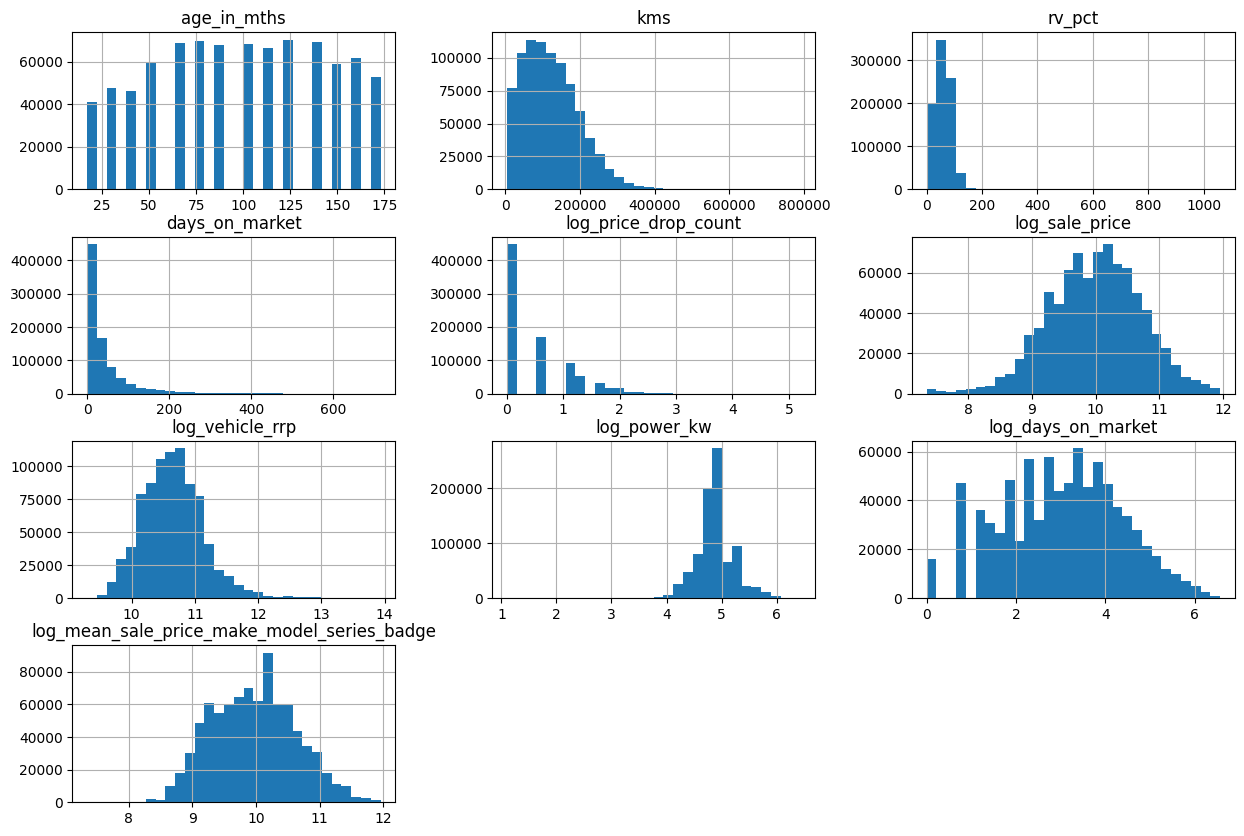

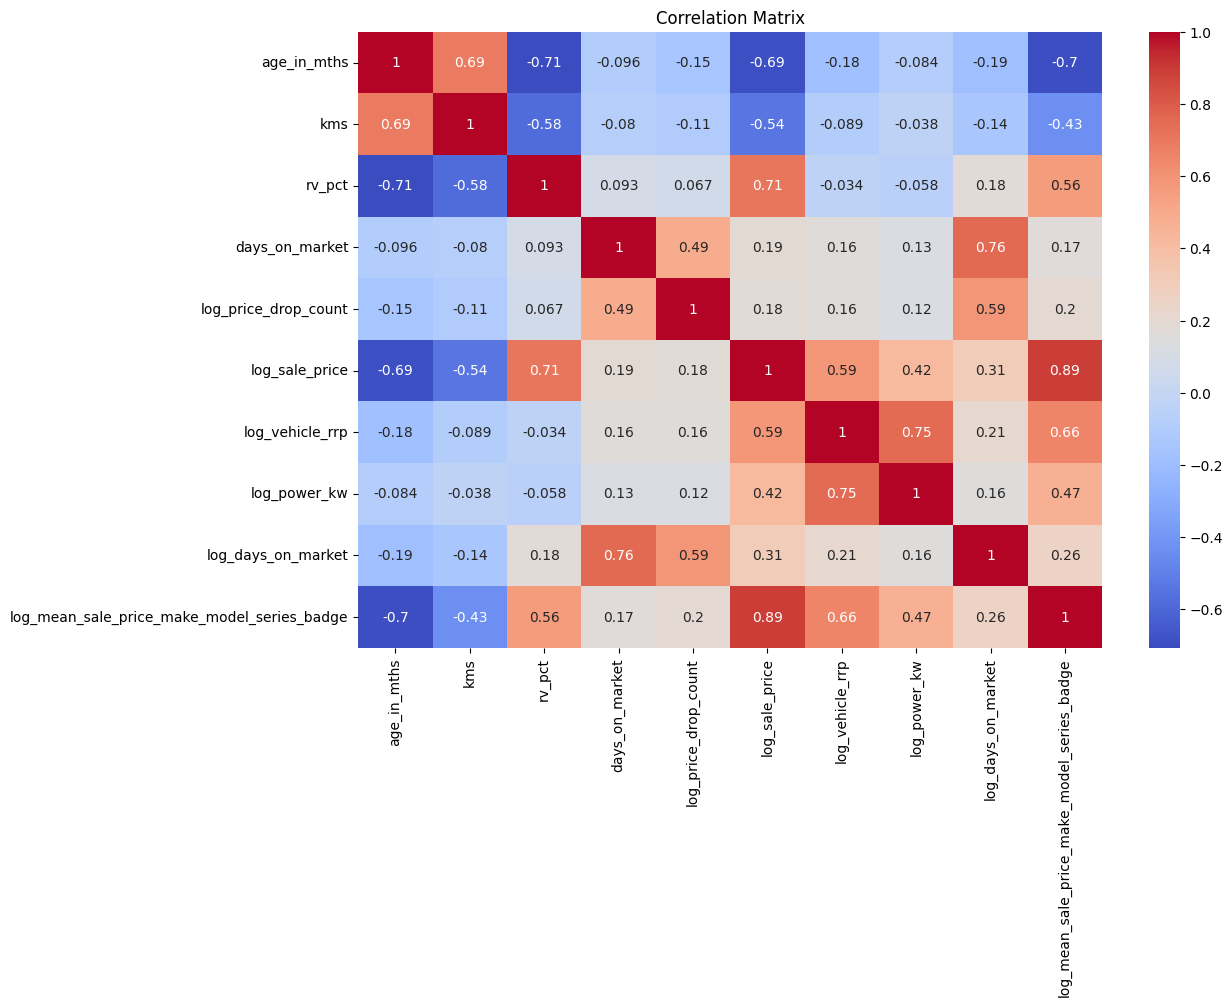

In [35]:
# visually analysis again

#Histograms for numerical columns

vehicle_data_cleaned.hist(bins=30, figsize=(15, 10))
plt.show()


# Select only numeric columns for correlation calculation
numeric_cols = vehicle_data_cleaned.select_dtypes(include=['float64', 'int64'])

# Correlation matrix
correlation_matrix = numeric_cols.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()